# Groove MIDI Dataset EDA

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shhommychon/pytorch_magenta/blob/main/_jupyternotebooks/01.%20Groove%20MIDI%20Dataset%20EDA.ipynb)

## 데이터 다운 및 분량 확인
  - https://magenta.tensorflow.org/datasets/groove

In [1]:
!wget https://storage.googleapis.com/magentadata/datasets/groove/groove-v1.0.0-midionly.zip
!unzip -qq groove-v1.0.0-midionly.zip

--2022-05-16 12:47:21--  https://storage.googleapis.com/magentadata/datasets/groove/groove-v1.0.0-midionly.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 74.125.203.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3260318 (3.1M) [application/zip]
Saving to: ‘groove-v1.0.0-midionly.zip’

groove-v1.0.0-midio 100%[===================>]   3.11M  --.-KB/s    in 0.02s   

2022-05-16 12:47:22 (150 MB/s) - ‘groove-v1.0.0-midionly.zip’ saved [3260318/3260318]



In [2]:
import pandas as pd

df = pd.read_csv("groove/info.csv")
df.sample(5)

,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split
912,drummer7,drummer7/session3,drummer7/session3/141,soul,105,fill,4-4,drummer7/session3/141_soul_105_fill_4-4.mid,drummer7/session3/141_soul_105_fill_4-4.wav,2.090478,train
706,drummer7,drummer7/session1,drummer7/session1/22,hiphop,100,beat,4-4,drummer7/session1/22_hiphop_100_beat_4-4.mid,drummer7/session1/22_hiphop_100_beat_4-4.wav,20.013750,train
885,drummer7,drummer7/session3,drummer7/session3/117,rock,95,beat,4-4,drummer7/session3/117_rock_95_beat_4-4.mid,drummer7/session3/117_rock_95_beat_4-4.wav,22.726318,test
1006,drummer7,drummer7/session3,drummer7/session3/83,neworleans/funk,93,fill,4-4,drummer7/session3/83_neworleans-funk_93_fill_4...,drummer7/session3/83_neworleans-funk_93_fill_4...,2.532257,train
290,drummer1,drummer1/session2,drummer1/session2/11,country,114,fill,4-4,drummer1/session2/11_country_114_fill_4-4.mid,drummer1/session2/11_country_114_fill_4-4.wav,1.941887,train


In [3]:
len(df), len(df.drop_duplicates()) # 전체 곡 수

(1150, 1150)

In [4]:
temp_df = df.groupby(["split", "beat_type"])[["id"]].count().reset_index()
temp_df = temp_df.pivot_table(index=["split"], columns=["beat_type"]).reset_index()
temp_df.columns = '', "beat", "fill"
temp_df = temp_df.set_index('')
temp_df["total"] = temp_df["beat"] + temp_df["fill"]
temp_df

,beat,fill,total
,,,
test,77,52,129
train,378,519,897
validation,48,76,124


## Time-Signature and Duration

In [5]:
temp_df = df.groupby(["split", "time_signature"])[["id"]].count().reset_index()
temp_df = temp_df.pivot_table(index=["split"], columns=["time_signature"]).reset_index().fillna(0)
temp_df.columns = '', "3-4", "4-4", "5-4", "5-8", "6-8"
temp_df = temp_df.set_index('').astype(int)
temp_df["total"] = temp_df["3-4"] + temp_df["4-4"] + temp_df["5-4"] + temp_df["5-8"] + temp_df["6-8"]
temp_df

,3-4,4-4,5-4,5-8,6-8,total
,,,,,,
test,0,129,0,0,0,129
train,4,887,1,1,4,897
validation,1,122,0,0,1,124


In [6]:
df[["bpm", "duration"]].describe()

,bpm,duration
count,1150.000000,1150.000000
mean,109.553913,42.517419
std,24.030843,86.615702
min,50.000000,0.679898
25%,94.000000,1.981718
50%,110.000000,3.716336
75%,125.000000,44.079123
max,290.000000,1394.173889


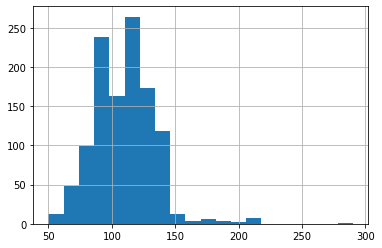

In [7]:
df["bpm"].hist(bins=20)

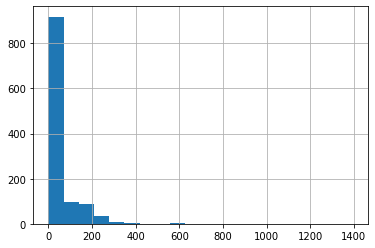

In [8]:
df["duration"].hist(bins=20)

In [9]:
temp_df = df[["bpm", "duration", "time_signature"]].copy()
temp_df["bpsXduration"] = temp_df["bpm"] / 60 * temp_df["duration"]
temp_df["bpsXduration_round"] = temp_df["bpsXduration"].apply(round)
temp_df.head()

,bpm,duration,time_signature,bpsXduration,bpsXduration_round
0,138,27.872308,4-4,64.106308,64
1,102,37.691158,4-4,64.074969,64
2,105,36.351218,4-4,63.614632,64
3,86,44.716543,4-4,64.093712,64
4,80,47.987500,4-4,63.983333,64


In [10]:
temp_df[["bpsXduration", "bpsXduration_round"]].describe()

,bpsXduration,bpsXduration_round
count,1150.000000,1150.000000
mean,77.323844,77.368696
std,163.323308,163.289434
min,1.677082,2.000000
25%,3.759376,4.000000
50%,7.448952,7.000000
75%,67.801019,68.000000
max,2555.985463,2556.000000


In [11]:
df["bpsXduration"] = df["bpm"] / 60 * df["duration"]

## Style

In [12]:
df["supstyle"] = df["style"].apply(lambda s: s.split('/')[0] if '/' in s else s)

print(df["supstyle"].nunique())
df["supstyle"].unique()

18


array(['funk', 'soul', 'hiphop', 'pop', 'rock', 'jazz', 'neworleans',
       'dance', 'latin', 'afrocuban', 'reggae', 'country', 'gospel',
       'punk', 'afrobeat', 'blues', 'middleeastern', 'highlife'],
      dtype=object)

In [13]:
temp_df = df.groupby(["split", "supstyle"])[["id"]].count().reset_index()
temp_df = temp_df.pivot_table(index=["supstyle"], columns=["split"]).reset_index().fillna(0)
temp_df.columns = '', "test", "train", "validation"
temp_df = temp_df.set_index('').astype(int)
temp_df

,test,train,validation
,,,
afrobeat,1,10,2
afrocuban,4,53,3
blues,0,4,0
country,5,21,3
dance,0,7,0
funk,23,122,15
gospel,1,13,5
highlife,1,1,0
hiphop,9,80,6


In [14]:
temp_df = df.groupby(["split", "supstyle"])[["bpsXduration"]].sum().reset_index()
temp_df = temp_df.pivot_table(index=["supstyle"], columns=["split"]).reset_index().fillna(0)
temp_df.columns = '', "test", "train", "validation"
temp_df = temp_df.set_index('')
temp_df # style 및 split 별 beat 수의 분포가 일정하지 않음

,test,train,validation
,,,
afrobeat,319.614423,3150.511164,478.097965
afrocuban,15.295829,3275.676945,11.027078
blues,0.000000,363.379017,0.000000
country,18.212505,563.508537,11.166671
dance,0.000000,2206.368167,0.000000
funk,2030.796209,6827.289048,1475.681753
gospel,3.647916,47.637502,293.841666
highlife,382.243367,192.339391,0.000000
hiphop,474.901974,3267.981002,90.764577


In [15]:
temp_list = sorted(df["style"].unique(), reverse=True)
total_count = len(temp_list)
for sup in sorted(df["supstyle"].unique()):
    count = 0
    print(sup)
    while temp_list:
        if sup in temp_list[-1]:
            print('\t' + temp_list.pop())
            count += 1
        else:
            break
    print(count)
    print()

print(f"total count of styles: {total_count}")

afrobeat
	afrobeat
1

afrocuban
	afrocuban
	afrocuban/bembe
	afrocuban/calypso
	afrocuban/rhumba
4

blues
	blues/shuffle
1

country
	country
1

dance
	dance/breakbeat
	dance/disco
2

funk
	funk
	funk/fast
	funk/groove1
	funk/groove2
	funk/groove5
	funk/latin
	funk/purdieshuffle
	funk/rock
8

gospel
	gospel
1

highlife
	highlife
1

hiphop
	hiphop
	hiphop/groove6
2

jazz
	jazz
	jazz/fast
	jazz/funk
	jazz/fusion
	jazz/klezmer
	jazz/linear
	jazz/march
	jazz/mediumfast
	jazz/swing
9

latin
	latin
	latin/ando
	latin/bomba
	latin/bounce
	latin/brazilian
	latin/brazilian-baiao
	latin/brazilian-bossa
	latin/brazilian-frevo
	latin/brazilian-ijexa
	latin/brazilian-maracatu
	latin/brazilian-samba
	latin/brazilian-sambareggae
	latin/brazilian-songo
	latin/chacarera
	latin/dominican-merengue
	latin/merengue
	latin/reggaeton
	latin/samba
	latin/venezuelan-joropo
	latin/venezuelan-merengue
	latin/venezuelan-sangueo
21

middleeastern
	middleeastern
1

neworleans
	neworleans/chacha
	neworleans/funk
	new

## 파일 구성

In [16]:
!pip install mido

     |████████████████████████████████| 51 kB 2.8 MB/s 


In [17]:
import mido
# https://mido.readthedocs.io/en/latest/lib.html?highlight=MidiFile#mido.MidiFile

dataset_dir = "/content/groove/"

def read_type(file_dir):
    mid_obj = mido.MidiFile(dataset_dir + file_dir)
    return mid_obj.type

def read_ticks_per_beat(file_dir):
    mid_obj = mido.MidiFile(dataset_dir + file_dir)
    return mid_obj.ticks_per_beat

def read_tracks_count(file_dir):
    mid_obj = mido.MidiFile(dataset_dir + file_dir)
    return len(mid_obj.tracks)

df["midi_type"] = df["midi_filename"].apply(read_type)
df["midi_ticks_per_beat"] = df["midi_filename"].apply(read_ticks_per_beat)
df["midi_tracks_count"] = df["midi_filename"].apply(read_tracks_count)

df.head()

,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split,bpsXduration,supstyle,midi_type,midi_ticks_per_beat,midi_tracks_count
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,27.872308,test,64.106308,funk,0,480,1
1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,102,beat,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,drummer1/eval_session/10_soul-groove10_102_bea...,37.691158,test,64.074969,soul,0,480,1
2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,105,beat,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,drummer1/eval_session/2_funk-groove2_105_beat_...,36.351218,test,63.614632,funk,0,480,1
3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,86,beat,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,drummer1/eval_session/3_soul-groove3_86_beat_4...,44.716543,test,64.093712,soul,0,480,1
4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,80,beat,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,drummer1/eval_session/4_soul-groove4_80_beat_4...,47.987500,test,63.983333,soul,0,480,1


In [18]:
df[["midi_type", "midi_ticks_per_beat", "midi_tracks_count"]].describe()

,midi_type,midi_ticks_per_beat,midi_tracks_count
count,1150.0,1150.0,1150.0
mean,0.0,480.0,1.0
std,0.0,0.0,0.0
min,0.0,480.0,1.0
25%,0.0,480.0,1.0
50%,0.0,480.0,1.0
75%,0.0,480.0,1.0
max,0.0,480.0,1.0


In [19]:
# type == 0: https://mido.readthedocs.io/en/latest/midi_files.html#file-types
# -> single track: all messages are saved in one track (tracks_count == 1)

In [20]:
# ticks_per_beat == 480: https://mido.readthedocs.io/en/latest/midi_files.html#tempo-and-beat-resolution
# -> 480 ticks exist in 1 beat

In [21]:
def read_notes_count(file_dir):
    mid_obj = mido.MidiFile(dataset_dir + file_dir)
    temp_list = [ msg_obj for msg_obj in mid_obj.tracks[0]
                    if type(msg_obj) is mido.messages.messages.Message ]
    return len(temp_list)

df["midi_notes_count"] = df["midi_filename"].apply(read_notes_count)

df["midi_notes_count"].describe()

count     1150.000000
mean      1228.296522
std       2892.520073
min          6.000000
25%         47.250000
50%        108.500000
75%        948.500000
max      42235.000000
Name: midi_notes_count, dtype: float64